# Final Exam and Presentation

In [125]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from pywaffle import Waffle
from imblearn.over_sampling import SMOTE
print("alles ready")

alles ready


## Basic Data Exploration

ich nutze pandas um den Datensatz besser kennenzulernen und zu bearbeiten 

**ich habe den Datensaz schon einmal bearbeitet und die nicht numerischen Daten umgewandelt**

In [105]:
df = pd.read_csv("stroke-data-preprocessed.csv")

df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.862035,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.699562,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


### Dataset Description

In [106]:
print("Initial Dataset Shape:", df.shape)

Initial Dataset Shape: (5110, 11)


Der Datensatz „stroke-data-preprocessed.csv“ enthält 5.110 Beobachtungen mit 11 Merkmalen in Bezug auf Demografie, Lebensstil und medizinische Bedingungen. Die Zielvariable ist `Schlaganfall`, die angibt, ob ein Patient einen Schlaganfall hatte (1) oder nicht (0).

**Die Merkmale umfassen:**
- Alter“ (numerisch), ‚Geschlecht‘ (codiert), ‚Bluthochdruck‘ (binär), ‚Herzkrankheit‘ (binär),
- Blutzuckerspiegel“, ‚BMI‘, ‚Arbeitstyp‘, ‚Wohnsitztyp‘, ‚Raucherstatus‘, usw.

Nichtnumerische Merkmale wurden bereits vor dem Laden kodiert. Zum Beispiel:
- `Geschlecht`: 0 = Weiblich, 1 = Männlich, 2 = Andere
- Wohnort-Typ": 0 = Ländlich, 1 = Städtisch


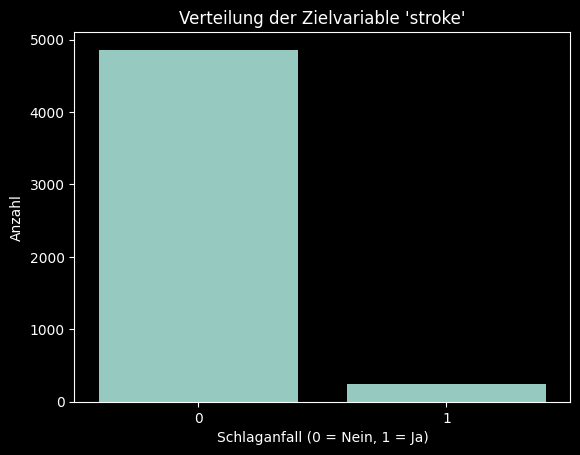

In [107]:
sns.countplot(x='stroke', data=df)
plt.title("Verteilung der Zielvariable 'stroke'")
plt.xlabel("Schlaganfall (0 = Nein, 1 = Ja)")
plt.ylabel("Anzahl")
plt.show()

Da die Zielvariable „Schlaganfall“ stark unausgewogen ist (nur ~5% positive Fälle), werden Standardmodelle wahrscheinlich in Richtung der Mehrheitsklasse verzerrt sein.
Um dies zu beheben, werde ich  später Strategien zum Klassenausgleich testen, wie zum Beispiel:
- Klassengewichtung
- Oversampling (z. B. SMOTE)
- Unterer Stichprobenumfang

### Behandlung von Ausreißern

Ausreißer wurden zunächst mit der IQR-Methode für numerische Variablen identifiziert. Das Entfernen dieser Ausreißer führte jedoch zu einer Verschlechterung des Modellls. Daher beschloss ich, Ausreißer beizubehalten.

In [108]:
#numeric_cols = df.select_dtypes(include=['number']).columns

#Q1 = df[numeric_cols].quantile(0.25) # 25% Quantil
#Q3 = df[numeric_cols].quantile(0.75) # 75% Quantil
#IQR = Q3 - Q1 # Interquartilbereich

#defineren der Außreißer -> Werte die außerhalb des Interquartilbereichs liegen

#lower_bound = Q1 - 1.5 * IQR 
#upper_bound = Q3 + 1.5 * IQR

#definerten Außenseiter mit NA ersetzen
#outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))
#df[numeric_cols] = df[numeric_cols].mask(outliers)

In [109]:
print("\nSummary Statistics (After Cleaning):\n")
print(df.describe())


Summary Statistics (After Cleaning):

            gender          age  hypertension  heart_disease  ever_married  \
count  5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean      0.414286    43.226614      0.097456       0.054012      0.656164   
std       0.493044    22.612647      0.296607       0.226063      0.475034   
min       0.000000     0.080000      0.000000       0.000000      0.000000   
25%       0.000000    25.000000      0.000000       0.000000      0.000000   
50%       0.000000    45.000000      0.000000       0.000000      1.000000   
75%       1.000000    61.000000      0.000000       0.000000      1.000000   
max       2.000000    82.000000      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  5110.000000     5110.000000        5110.000000  5110.000000   
mean      2.167710        0.508023         106.147677    28.862035   
std       1.090293        0.499985          45.2

### Visualiserung

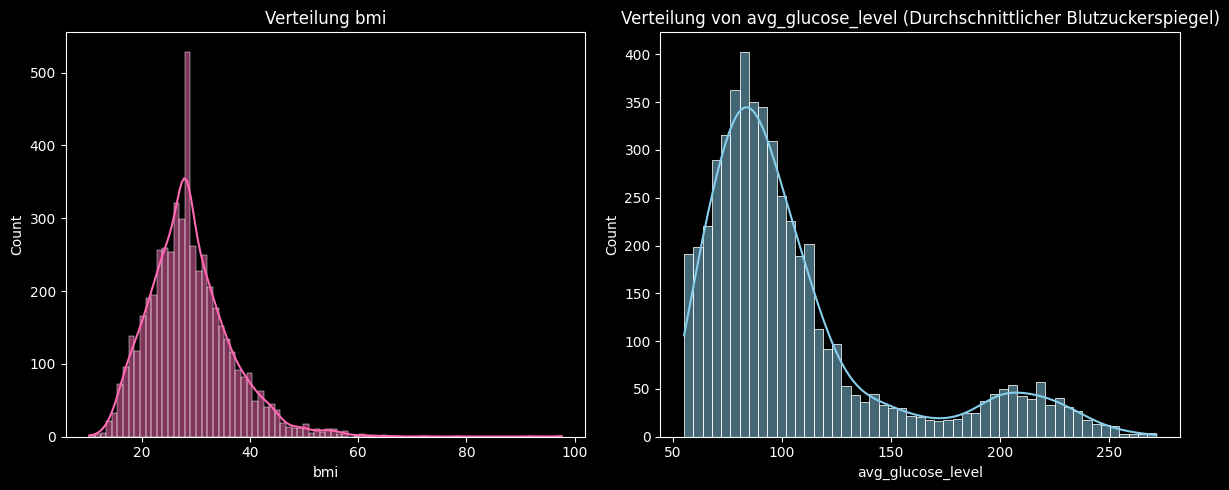

In [110]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], kde=True, color='hotpink')
plt.title('Verteilung bmi')


plt.subplot(1, 2, 2)
sns.histplot(df['avg_glucose_level'], kde=True, color='skyblue')
plt.title('Verteilung von avg_glucose_level (Durchschnittlicher Blutzuckerspiegel)')


plt.tight_layout()
plt.show()

/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_55992/1084090290.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


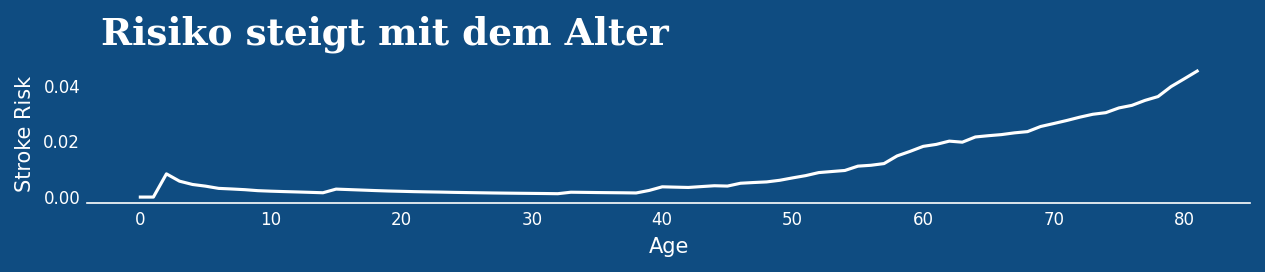

In [ ]:
background_color = "#0f4c81"  # schönes dunkles Blau
text_color = "white"

fig = plt.figure(figsize=(10, 3), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#0f4c81")  # Hintergrund innerhalb des Plots

df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    subset = df[df['age'] < i]
    if len(subset) > 0:
        rate.append(subset['stroke'].mean())
    else:
        rate.append(0)

sns.lineplot(data=rate, color='white', ax=ax0)

# Stil verbessern
for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8, colors='white')
ax0.tick_params(axis='both', which='both', length=0)

ax0.set_xlabel("Age", color='white')
ax0.set_ylabel("Stroke Risk", color='white')

ax0.text(-3, 0.055, 'Risiko steigt mit dem Alter', fontsize=18, fontfamily='serif', fontweight='bold', color=text_color)

plt.tight_layout()
plt.show()

# Quelle: https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5

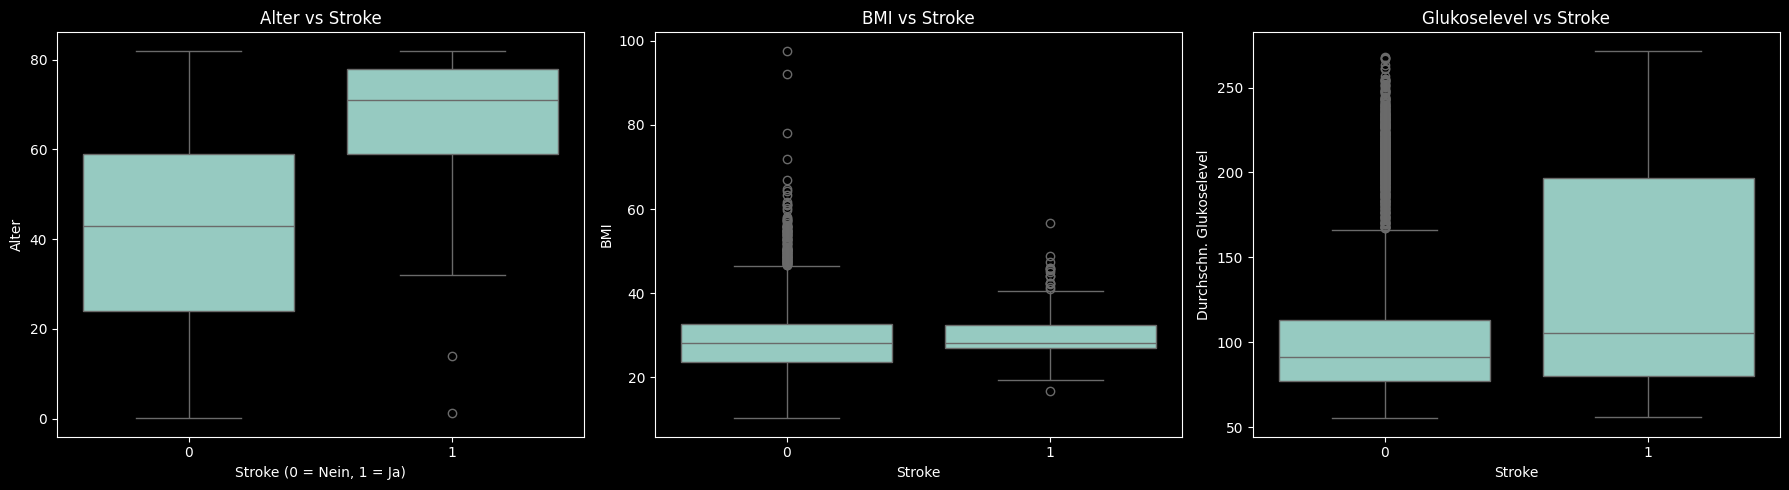

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x="stroke", y="age", ax=axs[0])
axs[0].set_title("Alter vs Stroke")
axs[0].set_xlabel("Stroke (0 = Nein, 1 = Ja)")
axs[0].set_ylabel("Alter")

sns.boxplot(data=df, x="stroke", y="bmi", ax=axs[1])
axs[1].set_title("BMI vs Stroke")
axs[1].set_xlabel("Stroke")
axs[1].set_ylabel("BMI")

sns.boxplot(data=df, x="stroke", y="avg_glucose_level", ax=axs[2])
axs[2].set_title("Glukoselevel vs Stroke")
axs[2].set_xlabel("Stroke")
axs[2].set_ylabel("Durchschn. Glukoselevel")

plt.tight_layout()
plt.show()

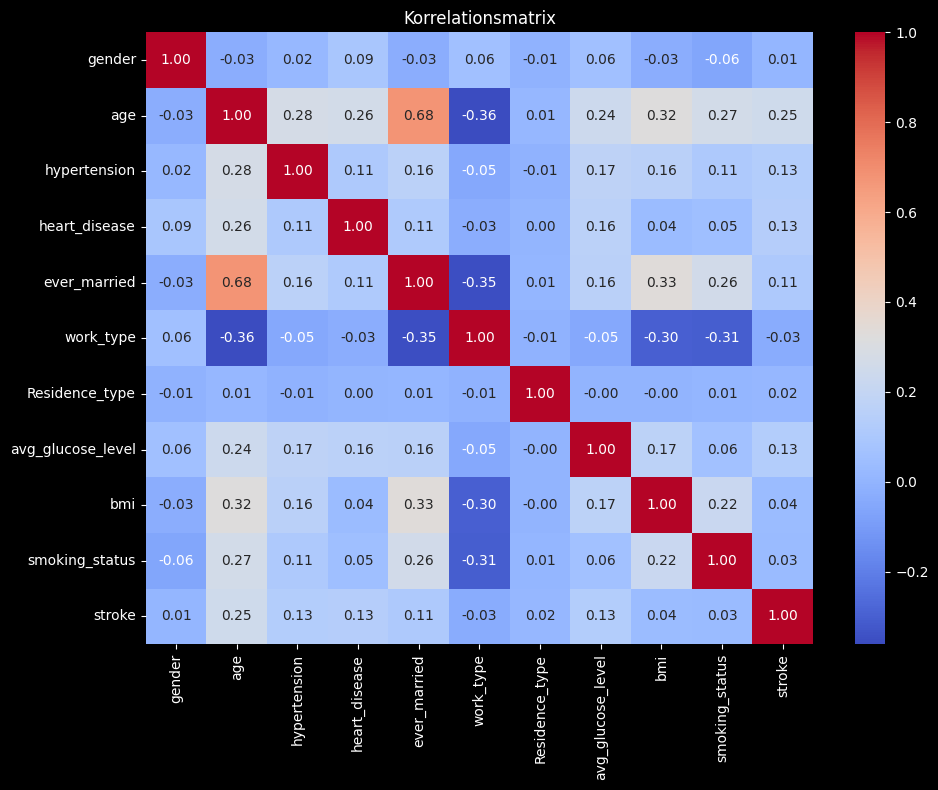

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.tight_layout()
plt.show()

•	Keine einzelne Variable hat eine extrem starke Korrelation mit stroke →  Einsatz von ML-Algorithmen, die nichtlineare Beziehungen erkennen (z. B. Random Forest)

/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_55992/3475478348.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='ward')


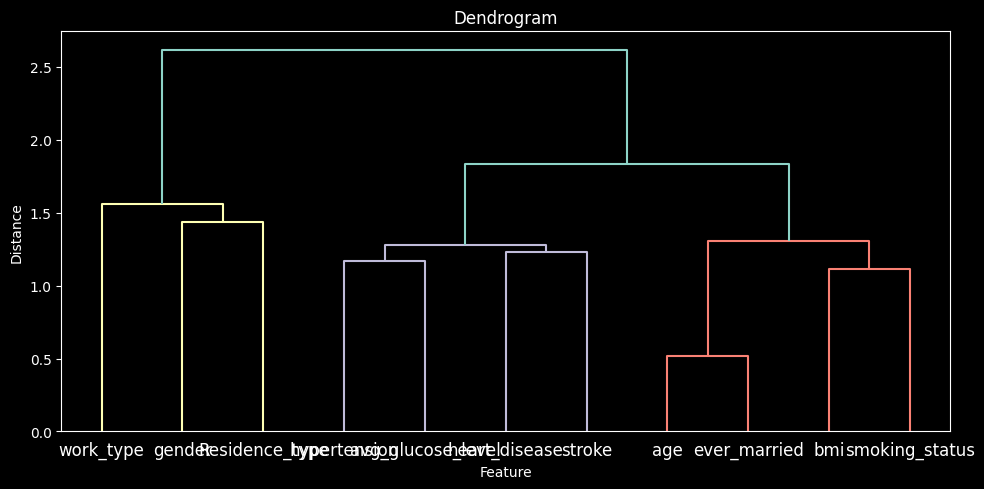

In [ ]:
# Korrelation der Features berechnen
corr = df.corr(numeric_only=True)

# Abstandsmatrix erzeugen (1 - Korrelation)
distance_matrix = 1 - corr

# Linkage-Matrix erstellen
linked = linkage(distance_matrix, method='ward')

# Dendrogramm zeichnen
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=corr.columns, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

**Nur 249 Schlaganfälle sind im Datensatz enthalten, der insgesamt 5000 umfasst - etwa 1 von 20**

## Chi2 mit diskreten Merkmalen

mit x lege ich meine Features fest. Also den variablen die mein Target vorhersagen sollen.

mit y lege ich meine predict target fest, also das was ich vorhersagen möcte. In dem Fall ist die Frage Schlaganfall (1) oder keine Schlaganfall (0)

In [ ]:
y = df["stroke"]

cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',]

X_cat = df[cat_features].copy()

for col in X_cat.columns:
    X_cat[col] = X_cat[col].astype('category').cat.codes

In [ ]:
X_cat.describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,0.097456,0.054012,0.656164,2.167710,0.508023,1.376908
std,0.493044,0.296607,0.226063,0.475034,1.090293,0.499985,1.071534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000
max,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000


/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_55992/3905703667.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_ranking, x="Chi2_Score", y="Feature", palette="viridis")



Chi-squared Feature Ranking:

          Feature  Chi2_Score       P_Value
2   heart_disease   87.987436  6.587154e-21
1    hypertension   75.449498  3.748736e-18
3    ever_married   20.622787  5.592648e-06
6  smoking_status    3.369423  6.641702e-02
4       work_type    2.925901  8.716857e-02
5  Residence_type    0.600717  4.383046e-01
0          gender    0.239001  6.249287e-01


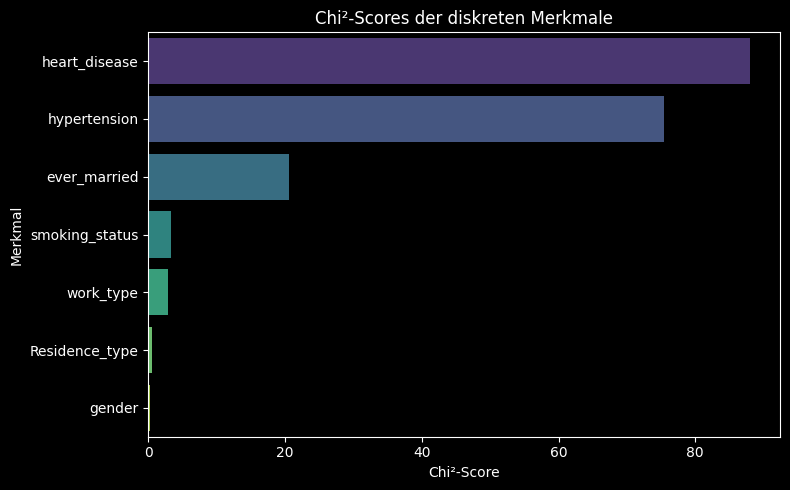

In [ ]:
chi2_scores, p_values = chi2(X_cat, y)


feature_ranking = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2_Score': chi2_scores,
    'P_Value': p_values
}).sort_values(by='Chi2_Score', ascending=False)

print("\nChi-squared Feature Ranking:\n")
print(feature_ranking)


plt.figure(figsize=(8, 5))
sns.barplot(data=feature_ranking, x="Chi2_Score", y="Feature", palette="viridis")
plt.title("Chi²-Scores der diskreten Merkmale")
plt.xlabel("Chi²-Score")
plt.ylabel("Merkmal")
plt.tight_layout()
plt.show()

## Definieren Merkmale und Zielvariable X ist dann zum "Füttern" des Modells und y ist das Ziel, das vorhergesagt werden soll

In [ ]:
X = df.drop(columns=['stroke'])
y = df['stroke']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [123]:
clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Py

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
best_clf = grid_search.best_estimator_
print("Beste Hyperparameter:", grid_search.best_params_)

Beste Hyperparameter: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=10, scoring='accuracy')
print("10-fold CV Accuracy Scores:", cv_scores)
print("Durchschnittliche Accuracy:", cv_scores.mean())

10-fold CV Accuracy Scores: [0.95833333 0.953125   0.95822454 0.95561358 0.95822454 0.95300261
 0.95561358 0.95561358 0.95561358 0.95561358]
Durchschnittliche Accuracy: 0.9558977915578764


## Testdaten vorhersagen

In [ ]:
y_pred = best_clf.predict(X_test)

## Evaluierung

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9374021909233177
Confusion Matrix:
 [[1198    0]
 [  80    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Applic

•	TP (True Positive): 11198 korrekt erkannt

•	FN (False Negative): 0 fälschlich als negativ klassifiziert

•	FP (False Positive): 80 fälschlich als positiv klassifiziert

•	TN (True Negative): 0 inaktive korrekt erkannt


**Model hat alle auf „kein Schlaganfall“ klassifiziert! Die Accuracy ist irreführend gut, weil fast alle in Klasse 0 sind**

## Featrue Importances

Top 10 wichtigste Merkmale:
avg_glucose_level    0.281105
age                  0.233217
bmi                  0.228521
smoking_status       0.070291
work_type            0.050750
Residence_type       0.033517
gender               0.031956
hypertension         0.025878
heart_disease        0.024324
ever_married         0.020442
dtype: float64


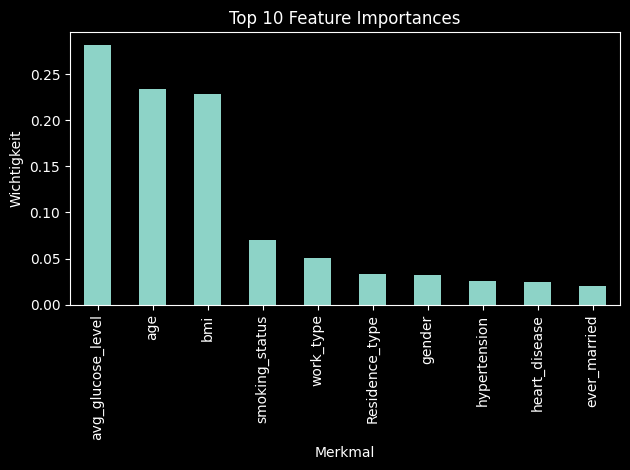

In [ ]:
importances = pd.Series(best_clf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
print("Top 10 wichtigste Merkmale:")
print(importances_sorted.head(10))

importances_sorted.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Wichtigkeit")
plt.xlabel("Merkmal")
plt.tight_layout()
plt.show()

Ein hoher Blutzuckerspiegel, ein höheres Alter und ein erhöhter BMI sind bekannte Risikofaktoren für einen Schlaganfall. Dies deckt sich gut mit der medizinischen Literatur und unterstützt die Logik des Modells.

## Versuch oversampling oder eher balanced

In [ ]:
clf2 = RandomForestClassifier(class_weight='balanced', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(clf2, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


Traceback (most recent call last):
  File "/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/d

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
best_clf2 = grid_search.best_estimator_
print("Beste Hyperparameter:", grid_search.best_params_)

Beste Hyperparameter: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
cv_scores = cross_val_score(best_clf2, X_train, y_train, cv=10, scoring='accuracy')
print("10-fold CV Accuracy Scores:", cv_scores)
print("Durchschnittliche Accuracy:", cv_scores.mean())

10-fold CV Accuracy Scores: [0.95833333 0.95572917 0.95822454 0.95561358 0.95822454 0.95300261
 0.95561358 0.95561358 0.95300261 0.95561358]
Durchschnittliche Accuracy: 0.9558971116187991


In [ ]:
y_pred2 = best_clf2.predict(X_test)

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Test Accuracy: 0.9374021909233177
Confusion Matrix:
 [[1198    0]
 [  80    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Applic

### SMOTE (Synthetic Minority Over-sampling Technique)

- SMOTE-Technik um unseren Datensatz auszugleichen

- es gibt mehr negative Beispiele für einen Schlaganfall, was das Modell beinträchtigt

- Bei unausgewogenen Datensatz kann es sinnvoll sein, die „Null Accuracy“ zu übertreffen

- suche nach dem Positiven („Schlaganfall“), desshalb den Kehrwert davon nehmen. Mit anderen Worten, es wird immer das häufigste Ergebnis vorhergesagt

- In diesem Fall: 249/(249+4861) = 0,048

- Ein gutes Ziel wären also 5 %~ für den Rückruf bei positiven Schlaganfallpatienten

In [111]:
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


In [112]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [113]:
X_test.head(2)

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
4688,1,31.0,0,0,3,64.85,23.0
4478,1,40.0,0,0,3,65.29,28.3


In [118]:
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_55992/34031636.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())
/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


jetzt sollten die Daten gleichmäßig sein 

In [120]:
clf3 = RandomForestClassifier(random_state=42)
clf3.fit(X_train_resh, y_train_resh)

RandomForestClassifier(random_state=42)

In [121]:
y_pred = clf3.predict(X_test)

In [122]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.885937936818563
Confusion Matrix:
 [[3132  272]
 [ 136   37]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9584    0.9201    0.9388      3404
           1     0.1197    0.2139    0.1535       173

    accuracy                         0.8859      3577
   macro avg     0.5391    0.5670    0.5462      3577
weighted avg     0.9178    0.8859    0.9009      3577



Anfänglich hat der Klassifikator aufgrund der starken Klassenungleichgewichts keine Schlaganfallfälle erkannt, was zu einer irreführend hohen Genauigkeit (93,7 %), aber einem Recall von 0,0 für die Minderheitenklasse geführt hat.


Nach der Anwendung von SMOTE für das Oversampling war das Modell in der Lage, 21 % der Schlaganfallfälle zu identifizieren, mit einer bescheidenen Präzision von 11,97 %. Obwohl die Gesamtgenauigkeit leicht auf 88,6 % sank, wurde das Modell in einem medizinischen Kontext, in dem die Nichterkennung echter Schlaganfälle kritisch sein kann, deutlich nützlicher.
